In [3]:
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings("ignore")

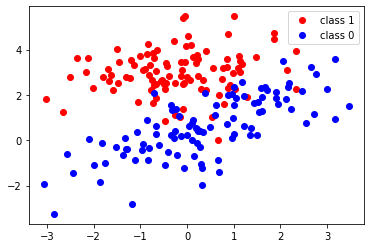

(200, 2) (200,)


In [7]:
# Prepare DataSet

np.random.seed(10)

num_points_each_cluster = 100

mu1 = [-0.4, 3]
covar1 = [[1.3,0],[0,1]]
mu2 = [0.5, 0.75]
covar2 = [[2.2,1.2],[1.8,2.1]]

X1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
X2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)

y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)

plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.legend(loc='best')
plt.show()

X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

print(X.shape, y.shape)


In [8]:
X_t = tf.constant(X,tf.float32)
y_t = tf.constant(y)

print("X = \n {0}".format(X_t[:5]))
print("\n")
print("y = {0}".format(y_t[:5]))



X = 
 Tensor("strided_slice:0", shape=(5, 2), dtype=float32)


y = Tensor("strided_slice_1:0", shape=(5,), dtype=float64)


In [10]:
x_t = tf.constant([0,0],tf.float32)
k = 5

neg_one = tf.constant(-1.0, dtype=tf.float32)

# we compute the L-1 distance

print("tf.subtract(X_t,x_t) = \n {0}".format(tf.subtract(X_t,x_t)[:5]),"\n")

print("tf.abs(tf.subtract(X_t,x_t) = \n{0}".format(tf.abs(tf.subtract(X_t,x_t)[:5])))

distances = tf.reduce_sum(tf.abs(tf.subtract(X_t,x_t)),1)

print("\n")

print("Disatance = {0}".format(distances[:5]))

# to find the nearest points, we find the farthest points based on negative distances
# we need this trick because tensorflow has top_k api and no closest_k or reverse=True api

neg_distances = tf.multiply(distances, neg_one)

print("neg_Disatance = {0}".format(neg_distances[:5]))

tf.subtract(X_t,x_t) = 
 Tensor("strided_slice_4:0", shape=(5, 2), dtype=float32) 

tf.abs(tf.subtract(X_t,x_t) = 
Tensor("Abs_2:0", shape=(5, 2), dtype=float32)


Disatance = Tensor("strided_slice_6:0", shape=(5,), dtype=float32)
neg_Disatance = Tensor("strided_slice_7:0", shape=(5,), dtype=float32)


In [19]:
# get the indices
vals, indx = tf.nn.top_k(neg_distances, k)

print(vals)
print(indx)

# Cross Veriy
print(tf.sort(neg_distances,direction='DESCENDING')[:4])

# slice the labels of these points
y_s = tf.gather(y_t, indx)

print(y_s)

counts = tf.math.bincount(tf.cast(y_s,tf.int32))

print(counts)

tf.argmax(counts)

Tensor("TopKV2_5:0", shape=(5,), dtype=float32)
Tensor("TopKV2_5:1", shape=(5,), dtype=int32)
Tensor("strided_slice_13:0", shape=(4,), dtype=float32)
Tensor("GatherV2_5:0", shape=(5,), dtype=float64)
Tensor("bincount_1/Bincount:0", shape=(1,), dtype=int32)


<tf.Tensor 'ArgMax:0' shape=() dtype=int64>